https://machinelearningmastery.com/feature-selection-with-categorical-data/

In [1]:
from pandas import read_csv

In [2]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv'

df = read_csv ( url , header = None , quotechar = "'" ) 

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,3-5,yes,2,left,right_up,no,recurrence-events


In [4]:
df.dropna( inplace = True )

In [5]:
data = df.values

In [15]:
X = data[ : , : -1 ]

y = data[ : , -1 ]

In [16]:
from sklearn.preprocessing import OrdinalEncoder

In [17]:
oe = OrdinalEncoder()

oe.fit( X )

OrdinalEncoder()

In [42]:
X_oe = oe.transform( X )

In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
le = LabelEncoder()

y = le.fit_transform( y )

# Base model

In [31]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.model_selection import cross_val_score

In [33]:
mdl = LogisticRegression( solver='lbfgs' )

cv = RepeatedStratifiedKFold( n_splits = 10 , n_repeats = 3 , random_state = 999 )

n_scores = cross_val_score( mdl , X_oe , y , scoring = 'accuracy' , cv = cv , n_jobs = -1 , error_score = 'raise' )

In [34]:
from numpy import mean

from numpy import std

In [35]:
print( f'accuracy : {mean(n_scores):.3f} ( {std(n_scores):.3f})' )

accuracy : 0.758 ( 0.063)


# Chi-Squared Feature Selection

In [25]:
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import chi2

In [26]:
feat_sel = SelectKBest( score_func = chi2 , k = 'all' )

feat_sel.fit( X_oe , y )

SelectKBest(k='all', score_func=<function chi2 at 0x000000001D0782F0>)

In [28]:
for i in range( len( feat_sel.scores_ ) ) :

    print( f'feature {i} : {feat_sel.scores_[ i ]:.3f}' )

feature 0 : 0.806
feature 1 : 0.873
feature 2 : 6.672
feature 3 : 101.526
feature 4 : 18.458
feature 5 : 15.165
feature 6 : 0.247
feature 7 : 0.665
feature 8 : 10.983


In [29]:
from matplotlib import pyplot

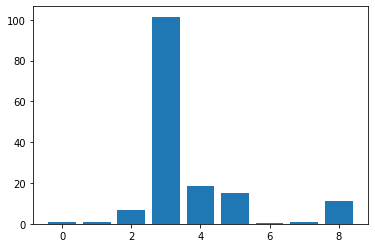

In [30]:
pyplot.bar( [ i for i in range( len( feat_sel.scores_ ) ) ] , feat_sel.scores_ )

pyplot.show()

# Model with chi2 selected features

In [50]:
feat_sel = SelectKBest( score_func = chi2 , k = 4 )

feat_sel.fit( X_oe , y )

SelectKBest(k=5, score_func=<function chi2 at 0x000000001D0782F0>)

In [51]:
X_oe_fs = feat_sel.transform( X_oe )

In [52]:
mdl = LogisticRegression( solver='lbfgs' )

cv = RepeatedStratifiedKFold( n_splits = 10 , n_repeats = 3 , random_state = 999 )

n_scores = cross_val_score( mdl , X_oe_fs , y , scoring = 'accuracy' , cv = cv , n_jobs = -1 , error_score = 'raise' )

print( f'accuracy : {mean(n_scores):.3f} ( {std(n_scores):.3f})' )

accuracy : 0.755 ( 0.065)


> Résultat moins bon du modèle avec sélection de variables vs. modèle sans sélection

# Mutual Information Feature Selection

In [54]:
from sklearn.feature_selection import mutual_info_classif

In [55]:
feat_sel = SelectKBest( score_func = mutual_info_classif , k = 'all' )

feat_sel.fit( X_oe , y )

SelectKBest(k='all',
            score_func=<function mutual_info_classif at 0x000000001D1F2598>)

In [56]:
for i in range( len( feat_sel.scores_ ) ) :

    print( f'feature {i} : {feat_sel.scores_[ i ]:.3f}' )

feature 0 : 0.005
feature 1 : 0.004
feature 2 : 0.003
feature 3 : 0.012
feature 4 : 0.060
feature 5 : 0.048
feature 6 : 0.000
feature 7 : 0.013
feature 8 : 0.038


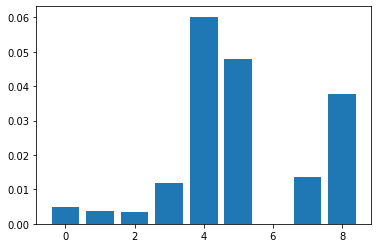

In [57]:
pyplot.bar( [ i for i in range( len( feat_sel.scores_ ) ) ] , feat_sel.scores_ )

pyplot.show()

# Model with mutual information selected features

In [58]:
feat_sel = SelectKBest( score_func = mutual_info_classif , k = 4 )

feat_sel.fit( X_oe , y )

SelectKBest(k=4,
            score_func=<function mutual_info_classif at 0x000000001D1F2598>)

In [59]:
X_oe_fs = feat_sel.transform( X_oe )

In [60]:
mdl = LogisticRegression( solver='lbfgs' )

cv = RepeatedStratifiedKFold( n_splits = 10 , n_repeats = 3 , random_state = 999 )

n_scores = cross_val_score( mdl , X_oe_fs , y , scoring = 'accuracy' , cv = cv , n_jobs = -1 , error_score = 'raise' )

print( f'accuracy : {mean(n_scores):.3f} ( {std(n_scores):.3f})' )

accuracy : 0.750 ( 0.063)


> Résultat moins bon du modèle avec sélection de variables vs. modèle sans sélection